In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/My_data_Competition/Competition/cascade-cup-22/train.csv")
data.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN


In [5]:
def pre_process(data):

  data["order_time"] = data["order_time"].astype("datetime64")
  data["order_date"] = data["order_date"].astype("datetime64")
  data["allot_time"] = data["allot_time"].astype("datetime64")
  data["accept_time"] = data["accept_time"].astype("datetime64")
  #data["pickup_time"] = data["pickup_time"].astype("datetime64")
  #data["delivered_time"] = data["delivered_time"].astype("datetime64")

  data_dropped = data.drop(['cancelled_time'], axis=1)

  data_dropped['accept_time'] = data_dropped['accept_time'].fillna(pd.Timestamp.min)
  #data_dropped['pickup_time'] = data_dropped['pickup_time'].fillna(pd.Timestamp.min)
  data_dropped['delivered_time'] = data_dropped['delivered_time'].fillna(pd.Timestamp.min)

  data_dropped['accept_time_day'] =data_dropped['accept_time'].dt.day
  data_dropped['accept_time_month'] =data_dropped['accept_time'].dt.month
  data_dropped['accept_time_year'] =data_dropped['accept_time'].dt.year
  data_dropped['accept_time_hour'] =data_dropped['accept_time'].dt.hour
  data_dropped['accept_time_min'] =data_dropped['accept_time'].dt.minute
  data_dropped['accept_time_sec'] =data_dropped['accept_time'].dt.second

  '''data_dropped['pickup_time_day'] =data_dropped['pickup_time'].dt.day
  data_dropped['pickup_time_month'] =data_dropped['pickup_time'].dt.month
  data_dropped['pickup_time_year'] =data_dropped['pickup_time'].dt.year
  data_dropped['pickup_time_hour'] =data_dropped['pickup_time'].dt.hour
  data_dropped['pickup_time_min'] =data_dropped['pickup_time'].dt.minute
  data_dropped['pickup_time_sec'] =data_dropped['pickup_time'].dt.second

  data_dropped['delivered_time_day'] =data_dropped['delivered_time'].dt.day
  data_dropped['delivered_time_month'] =data_dropped['delivered_time'].dt.month
  data_dropped['delivered_time_year'] =data_dropped['delivered_time'].dt.year
  data_dropped['delivered_time_hour'] =data_dropped['delivered_time'].dt.hour
  data_dropped['delivered_time_min'] =data_dropped['delivered_time'].dt.minute
  data_dropped['delivered_time_sec'] =data_dropped['delivered_time'].dt.second'''


  data_dropped['order_time_day'] =data_dropped['order_time'].dt.day
  data_dropped['order_time_month'] =data_dropped['order_time'].dt.month
  data_dropped['order_time_year'] =data_dropped['order_time'].dt.year
  data_dropped['order_time_hour'] =data_dropped['order_time'].dt.hour
  data_dropped['order_time_min'] =data_dropped['order_time'].dt.minute
  data_dropped['order_time_sec'] =data_dropped['order_time'].dt.second



  data_dropped['allot_time_day'] =data_dropped['allot_time'].dt.day
  data_dropped['allot_time_month'] =data_dropped['allot_time'].dt.month
  data_dropped['allot_time_year'] =data_dropped['allot_time'].dt.year
  data_dropped['allot_time_hour'] =data_dropped['allot_time'].dt.hour
  data_dropped['allot_time_min'] =data_dropped['allot_time'].dt.minute
  data_dropped['allot_time_sec'] =data_dropped['allot_time'].dt.second


  #data_dropped = data_dropped.drop(['rider_id','accept_time','pickup_time','delivered_time','order_time','allot_time','order_date'],axis=1)


  data_dropped['alloted_orders'] = data_dropped['alloted_orders'].fillna(data_dropped['alloted_orders'].median())
  data_dropped['delivered_orders'] = data_dropped['delivered_orders'].fillna(data_dropped['delivered_orders'].median())
  data_dropped['undelivered_orders'] = data_dropped['undelivered_orders'].fillna(data_dropped['undelivered_orders'].median())
  data_dropped['lifetime_order_count'] = data_dropped['lifetime_order_count'].fillna(data_dropped['lifetime_order_count'].mean())
  data_dropped['session_time'] = data_dropped['session_time'].fillna(data_dropped['session_time'].mean())

  data_onehot = pd.get_dummies(data_dropped, columns=['reassignment_method','reassignment_reason','reassigned_order'])

  data_onehot['reassignment_reason_Auto_Reassignment']= data_onehot['reassignment_reason_Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket']
  data_onehot['reassignment_reason_Reassignment_Request']= data_onehot['reassignment_reason_Reassignment Request from SE portal.']

  data_onehot = data_onehot.drop(['order_id','rider_id','accept_time','pickup_time','delivered_time','order_time','allot_time','order_date','reassignment_reason_Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket','reassignment_reason_Reassignment Request from SE portal.'],axis=1)

  data_onehot = data_onehot.dropna()

  return data_onehot


In [6]:
data_onehot = pre_process(data)

In [7]:
data_onehot

,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,session_time,accept_time_day,accept_time_month,accept_time_year,accept_time_hour,accept_time_min,accept_time_sec,order_time_day,order_time_month,order_time_year,order_time_hour,order_time_min,order_time_sec,allot_time_day,allot_time_month,allot_time_year,allot_time_hour,allot_time_min,allot_time_sec,reassignment_method_auto,reassignment_method_manual,reassignment_reason_Reassign,reassigned_order_1.0,reassignment_reason_Auto_Reassignment,reassignment_reason_Reassignment_Request
0,1.5666,2.65,46.0,46.0,0,0.0,621.0,220.474779,26,1,2021,2,22,8,26,1,2021,2,21,35,26,1,2021,2,21,59,0,0,0,0,0,0
1,2.5207,2.76,8.0,8.0,0,0.0,105.0,3.266667,26,1,2021,2,34,45,26,1,2021,2,33,16,26,1,2021,2,33,57,0,0,0,0,0,0
2,2.2074,4.80,1.0,1.0,0,0.0,66.0,9.816667,26,1,2021,2,40,13,26,1,2021,2,39,49,26,1,2021,2,39,57,0,0,0,0,0,0
3,2.1894,6.38,1.0,1.0,0,0.0,127.0,17.533333,26,1,2021,2,49,6,26,1,2021,2,47,53,26,1,2021,2,48,25,0,0,0,0,0,0
4,2.7870,4.01,34.0,34.0,0,0.0,84.0,1.350000,26,1,2021,3,7,57,26,1,2021,3,6,30,26,1,2021,3,7,21,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,0.5789,0.19,4.0,4.0,0,0.0,127.0,369.516667,6,2,2021,10,4,14,6,2,2021,10,3,16,6,2,2021,10,3,44,0,0,0,0,0,0
449996,1.9863,1.19,81.0,81.0,0,0.0,105.0,239.133333,6,2,2021,10,4,34,6,2,2021,10,3,17,6,2,2021,10,3,18,0,0,0,0,0,0
449997,1.5944,1.61,28.0,28.0,0,0.0,1488.0,204.150000,6,2,2021,10,4,39,6,2,2021,10,3,18,6,2,2021,10,4,6,0,0,0,0,0,0
449998,2.8939,4.68,72.0,72.0,0,0.0,105.0,65.583333,6,2,2021,10,5,41,6,2,2021,10,3,19,6,2,2021,10,3,19,0,0,0,0,0,0


In [65]:
#first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count

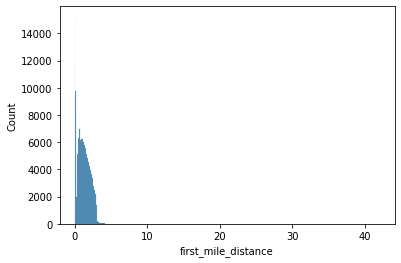

In [8]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x = 'first_mile_distance',
            data = data_onehot)
 
# Show the plot
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


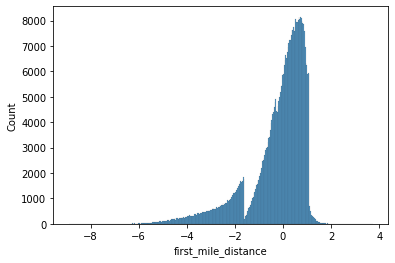

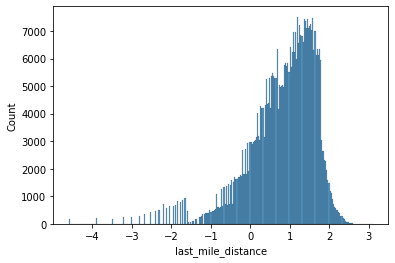

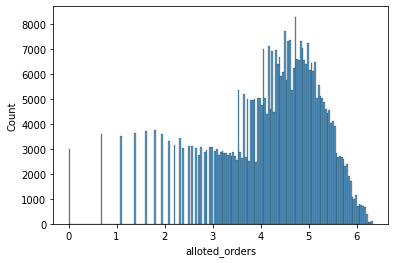

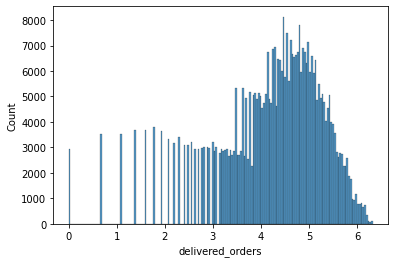

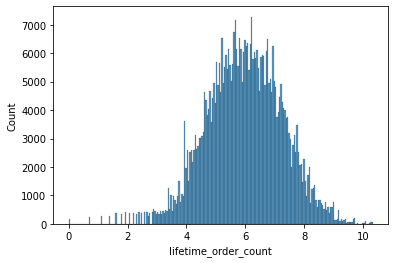

In [80]:
'''data_onehot['first_mile_distance'] = np.log(data['first_mile_distance'])
data_onehot['last_mile_distance'] = np.log(data['last_mile_distance'])
data_onehot['alloted_orders'] = np.log(data['alloted_orders'])
data_onehot['delivered_orders'] = np.log(data['delivered_orders'])
#data_onehot['undelivered_orders'] = np.log(data['undelivered_orders'])
data_onehot['lifetime_order_count'] = np.log(data['lifetime_order_count'])
sns.histplot(x = 'first_mile_distance',data = data_onehot)
plt.show()
sns.histplot(x = 'last_mile_distance',data = data_onehot)
plt.show()
sns.histplot(x = 'alloted_orders',data = data_onehot)
plt.show()
sns.histplot(x = 'delivered_orders',data = data_onehot)
plt.show()
#sns.histplot(x = 'undelivered_orders',data = data_onehot)
#plt.show()
sns.histplot(x = 'lifetime_order_count',data = data_onehot)
plt.show()'''

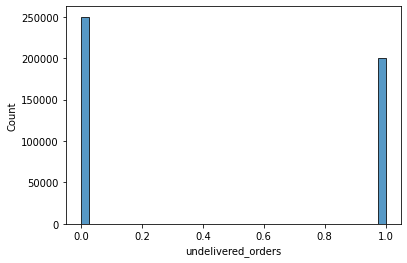

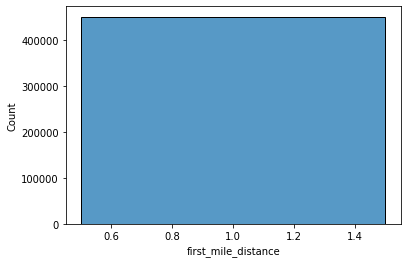

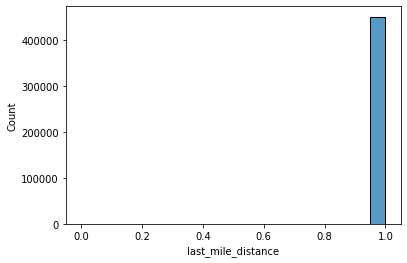

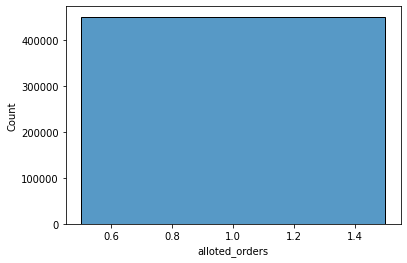

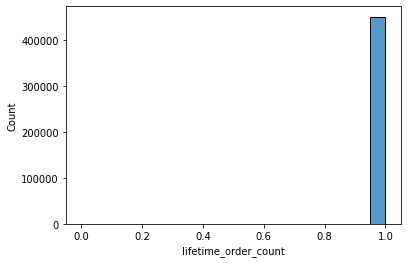

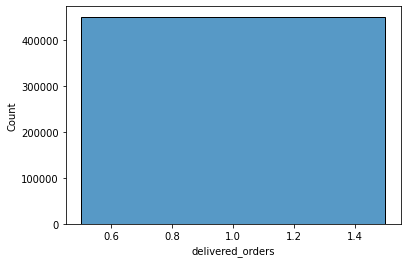

In [9]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
data_onehot['undelivered_orders'] = normalizer.fit_transform(data_onehot[['undelivered_orders']])
sns.histplot(x = 'undelivered_orders',data = data_onehot)
plt.show()
data_onehot['first_mile_distance'] = normalizer.fit_transform(data_onehot[['first_mile_distance']])
sns.histplot(x = 'first_mile_distance',data = data_onehot)
plt.show()
data_onehot['last_mile_distance'] = normalizer.fit_transform(data_onehot[['last_mile_distance']])
sns.histplot(x = 'last_mile_distance',data = data_onehot)
plt.show()
data_onehot['alloted_orders'] = normalizer.fit_transform(data_onehot[['alloted_orders']])
sns.histplot(x = 'alloted_orders',data = data_onehot)
plt.show()
data_onehot['lifetime_order_count'] = normalizer.fit_transform(data_onehot[['lifetime_order_count']])
sns.histplot(x = 'lifetime_order_count',data = data_onehot)
plt.show()
data_onehot['delivered_orders'] = normalizer.fit_transform(data_onehot[['delivered_orders']])
sns.histplot(x = 'delivered_orders',data = data_onehot)
plt.show()

In [10]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)


y = data_onehot['cancelled']
X = data_onehot.drop('cancelled', axis=1)
X, y = sm.fit_resample(X, y)

In [11]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4 , random_state=42)



In [12]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

feature_names = X.columns 
forest = RandomForestClassifier(random_state=0)
forest.fit(np.array(X_train), np.array(y_train))

RandomForestClassifier(random_state=0)

In [13]:
'cancelled' in X_test.columns

False

In [14]:
from sklearn.metrics import classification_report
y_pred = forest.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


              precision    recall  f1-score   support

           0       0.98      0.98      0.98    177833
           1       0.98      0.98      0.98    177993

    accuracy                           0.98    355826
   macro avg       0.98      0.98      0.98    355826
weighted avg       0.98      0.98      0.98    355826



In [15]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")


Elapsed time to compute the importances: 0.237 seconds


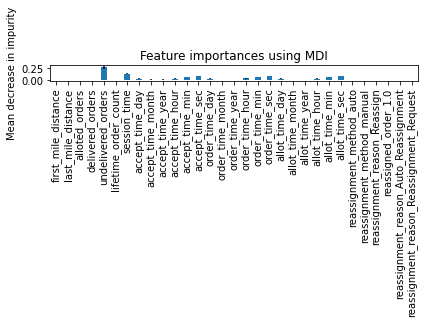

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [17]:
forest_importances

first_mile_distance                         0.000000
last_mile_distance                          0.001860
alloted_orders                              0.000000
delivered_orders                            0.000000
undelivered_orders                          0.263842
lifetime_order_count                        0.000415
session_time                                0.130986
accept_time_day                             0.027782
accept_time_month                           0.005903
accept_time_year                            0.004775
accept_time_hour                            0.026010
accept_time_min                             0.062165
accept_time_sec                             0.079850
order_time_day                              0.022513
order_time_month                            0.001447
order_time_year                             0.000000
order_time_hour                             0.030527
order_time_min                              0.064542
order_time_sec                              0.

In [19]:
test_data = pd.read_csv("/content/drive/MyDrive/My_data_Competition/test.csv")

In [20]:
!pip install pandas-profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(test_data)
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

TypeError: ignored

In [121]:
list(set(data.columns) - set(test_data.columns))

['cancelled_time', 'pickup_time', 'delivered_time', 'cancelled']

In [145]:
def pre_process_test(data):

  data["order_time"] = data["order_time"].astype("datetime64")
  data["order_date"] = data["order_date"].astype("datetime64")
  data["allot_time"] = data["allot_time"].astype("datetime64")
  data["accept_time"] = data["accept_time"].astype("datetime64")
  #data["pickup_time"] = data["pickup_time"].astype("datetime64")
  #data["delivered_time"] = data["delivered_time"].astype("datetime64")

  #data_dropped = data.drop(['cancelled_time'], axis=1)
  data_dropped = data
  data_dropped['accept_time'] = data_dropped['accept_time'].fillna(pd.Timestamp.min)
  #data_dropped['pickup_time'] = data_dropped['pickup_time'].fillna(pd.Timestamp.min)
  #data_dropped['delivered_time'] = data_dropped['delivered_time'].fillna(pd.Timestamp.min)

  data_dropped['accept_time_day'] =data_dropped['accept_time'].dt.day
  data_dropped['accept_time_month'] =data_dropped['accept_time'].dt.month
  data_dropped['accept_time_year'] =data_dropped['accept_time'].dt.year
  data_dropped['accept_time_hour'] =data_dropped['accept_time'].dt.hour
  data_dropped['accept_time_min'] =data_dropped['accept_time'].dt.minute
  data_dropped['accept_time_sec'] =data_dropped['accept_time'].dt.second

  '''data_dropped['pickup_time_day'] =data_dropped['pickup_time'].dt.day
  data_dropped['pickup_time_month'] =data_dropped['pickup_time'].dt.month
  data_dropped['pickup_time_year'] =data_dropped['pickup_time'].dt.year
  data_dropped['pickup_time_hour'] =data_dropped['pickup_time'].dt.hour
  data_dropped['pickup_time_min'] =data_dropped['pickup_time'].dt.minute
  data_dropped['pickup_time_sec'] =data_dropped['pickup_time'].dt.second

  data_dropped['delivered_time_day'] =data_dropped['delivered_time'].dt.day
  data_dropped['delivered_time_month'] =data_dropped['delivered_time'].dt.month
  data_dropped['delivered_time_year'] =data_dropped['delivered_time'].dt.year
  data_dropped['delivered_time_hour'] =data_dropped['delivered_time'].dt.hour
  data_dropped['delivered_time_min'] =data_dropped['delivered_time'].dt.minute
  data_dropped['delivered_time_sec'] =data_dropped['delivered_time'].dt.second'''


  data_dropped['order_time_day'] =data_dropped['order_time'].dt.day
  data_dropped['order_time_month'] =data_dropped['order_time'].dt.month
  data_dropped['order_time_year'] =data_dropped['order_time'].dt.year
  data_dropped['order_time_hour'] =data_dropped['order_time'].dt.hour
  data_dropped['order_time_min'] =data_dropped['order_time'].dt.minute
  data_dropped['order_time_sec'] =data_dropped['order_time'].dt.second



  data_dropped['allot_time_day'] =data_dropped['allot_time'].dt.day
  data_dropped['allot_time_month'] =data_dropped['allot_time'].dt.month
  data_dropped['allot_time_year'] =data_dropped['allot_time'].dt.year
  data_dropped['allot_time_hour'] =data_dropped['allot_time'].dt.hour
  data_dropped['allot_time_min'] =data_dropped['allot_time'].dt.minute
  data_dropped['allot_time_sec'] =data_dropped['allot_time'].dt.second


  #data_dropped = data_dropped.drop(['rider_id','accept_time','pickup_time','delivered_time','order_time','allot_time','order_date'],axis=1)


  data_dropped['alloted_orders'] = data_dropped['alloted_orders'].fillna(data_dropped['alloted_orders'].median())
  data_dropped['delivered_orders'] = data_dropped['delivered_orders'].fillna(data_dropped['delivered_orders'].median())
  data_dropped['undelivered_orders'] = data_dropped['undelivered_orders'].fillna(data_dropped['undelivered_orders'].median())
  data_dropped['lifetime_order_count'] = data_dropped['lifetime_order_count'].fillna(data_dropped['lifetime_order_count'].mean())
  data_dropped['session_time'] = data_dropped['session_time'].fillna(data_dropped['session_time'].mean())

  data_onehot = pd.get_dummies(data_dropped, columns=['reassignment_method','reassignment_reason','reassigned_order'])

  data_onehot['reassignment_reason_Auto_Reassignment']= data_onehot['reassignment_reason_Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket']
  data_onehot['reassignment_reason_Reassignment_Request']= data_onehot['reassignment_reason_Reassignment Request from SE portal.']

  data_onehot = data_onehot.drop(['order_id','rider_id','accept_time','order_time','allot_time','order_date','reassignment_reason_Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket','reassignment_reason_Reassignment Request from SE portal.'],axis=1)

  #beral = data_onehot.dropna()

  return data_onehot

In [130]:
test_data.columns

Index(['order_time', 'order_id', 'order_date', 'allot_time', 'accept_time',
       'rider_id', 'first_mile_distance', 'last_mile_distance',
       'alloted_orders', 'delivered_orders', 'undelivered_orders',
       'lifetime_order_count', 'reassignment_method', 'reassignment_reason',
       'reassigned_order', 'session_time', 'accept_time_day',
       'accept_time_month', 'accept_time_year', 'accept_time_hour',
       'accept_time_min', 'accept_time_sec', 'order_time_day',
       'order_time_month', 'order_time_year', 'order_time_hour',
       'order_time_min', 'order_time_sec', 'allot_time_day',
       'allot_time_month', 'allot_time_year', 'allot_time_hour',
       'allot_time_min', 'allot_time_sec'],
      dtype='object')

In [146]:
data_test = pre_process_test(test_data)

In [147]:
forest.predict(data_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0, 0, 0, ..., 0, 0, 0])

In [143]:
data_test.head(5)

,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,session_time,accept_time_day,accept_time_month,accept_time_year,accept_time_hour,accept_time_min,accept_time_sec,order_time_day,order_time_month,order_time_year,order_time_hour,order_time_min,order_time_sec,allot_time_day,allot_time_month,allot_time_year,allot_time_hour,allot_time_min,allot_time_sec,reassignment_method_auto,reassignment_method_manual,reassignment_reason_Reassign,reassigned_order_1.0,reassignment_reason_Auto_Reassignment,reassignment_reason_Reassignment_Request
0,1.6585,4.54,216.0,215.0,1.0,747.0,273.400000,6,2,2021,10,4,15,6,2,2021,10,3,24,6,2,2021,10,3,49,0,0,0,0,0,0
1,2.0709,5.84,52.0,52.0,0.0,75.0,252.100000,6,2,2021,10,3,36,6,2,2021,10,3,26,6,2,2021,10,3,27,0,0,0,0,0,0
2,1.3884,0.99,289.0,289.0,0.0,2214.0,241.383333,6,2,2021,10,5,34,6,2,2021,10,3,27,6,2,2021,10,4,14,0,0,0,0,0,0
3,1.9039,2.59,125.0,122.0,3.0,1020.0,291.933333,6,2,2021,10,3,53,6,2,2021,10,3,29,6,2,2021,10,3,30,0,0,0,0,0,0
4,0.8275,0.94,352.0,350.0,2.0,7284.0,247.133333,6,2,2021,10,4,43,6,2,2021,10,3,35,6,2,2021,10,3,43,0,0,0,0,0,0


In [148]:
submission_data = pd.DataFrame()
submission_data['order_id'] = test_data['order_id']
submission_data['cancelled'] = forest.predict(data_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [151]:
submission_data.to_csv("submission_3.csv", index=False)

In [150]:
submission_data.groupby('cancelled').count()

,order_id
cancelled,
0,144145
1,699


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline, Pipeline

clf = Pipeline([MinMaxScaler(), normalize(), SGDClassifier(loss='hinge',learning_rate='optimal', eta0=0.01, penalty="l1", verbose=1, alpha=0.0001)])
clf.fit(X_train, y_train)


TypeError: ignored

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.61      0.63     43787
         1.0       0.64      0.68      0.66     44086

    accuracy                           0.65     87873
   macro avg       0.65      0.65      0.65     87873
weighted avg       0.65      0.65      0.65     87873

